In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

from os.path import join as opj

# this notebook plots the autospectrum and correlation noise pseudospectrum,
# averaged over splits, for a given array (pair), frequency (pair),
# and polarization (pair) of act_dr6.01 data. the mask in which these spectra
# are measured is large and smooth, so the powerspectrum will be qualitatively
# very similar.

### inputs
my_arr1 = 6 # array of the autospectrum i will plot (4 for pa4, etc.)
my_arr2 = 6 # second array for the correlation spectrum

my_freq1 = 'f090' # frequency band of the autospectrum i will plot
my_freq2 = 'f150' # second frequency band for the correlation spectrum

my_pol1 = 'E' # polarization of the autospectrum i will plot (T, E, B)
my_pol2 = 'E' # second polarization for the correlation spectrum

lmin = 100 # the minimum ell to use
lmax = 10800 # the maximum ell to use
delta_ell = 25 # the width of a tophat smoothing kernel for plotting

data_directory = '.' # where the data files live on my system

In [14]:
### load the noise curves

# shape is (narr=3, nfreq=2, nsplit=8, npol=3, lmax+1=10801)
N_ell = np.load(opj(data_directory, 'N_ell_pa4_pa5_pa6_dr6v3_v3_dr6v3_20220316_baseline_union_mask_lmax10800_pickupFalse.npy')) 

# shape is (narr=3, narr=3, nfreq=2, nfreq=2, npol=3, npol=3, nsplit=8, lmax+1=10801)
r_ell = np.load(opj(data_directory, 'r_ell_pa4_pa5_pa6_dr6v3_v3_dr6v3_20220316_baseline_union_mask_lmax10800_pickupFalse.npy'))

In [15]:
### cut ells and smooth curves
lsel = np.s_[..., lmin:lmax+1]
l = np.arange(lmax+1)[lsel]
N_ell = ndimage.uniform_filter1d(N_ell[lsel], delta_ell, axis=-1, mode='nearest')
r_ell = ndimage.uniform_filter1d(r_ell[lsel], delta_ell, axis=-1, mode='nearest')

In [16]:
### convert inputs into indices that we will use to plot data subsets

# get index of my arrays
my_arr_index1 = [4, 5, 6].index(my_arr1)
my_arr_index2 = [4, 5, 6].index(my_arr2)

# get index of my frequency bands
arrs2freqs = {
    4: ['f150', 'f220'],
    5: ['f090', 'f150'],
    6: ['f090', 'f150']
}
my_freq_index1 = arrs2freqs[my_arr1].index(my_freq1)
my_freq_index2 = arrs2freqs[my_arr2].index(my_freq2)

# get index of my pols
my_pol_index1 = 'TEB'.index(my_pol1)
my_pol_index2 = 'TEB'.index(my_pol2)

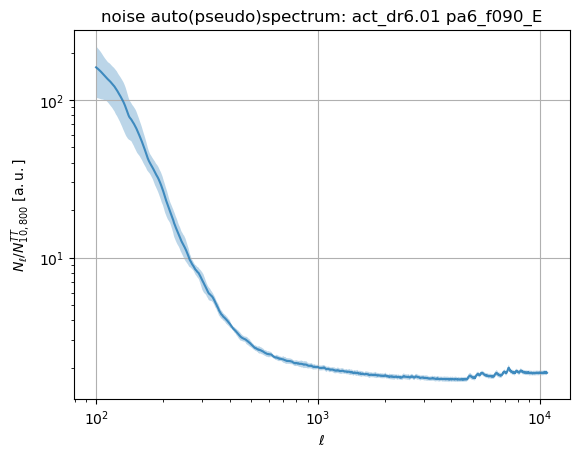

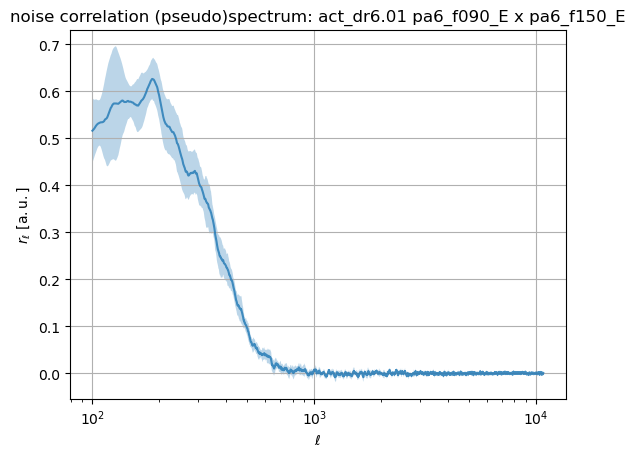

In [17]:
### plot curves (average and scatter over nsplit=8 splits)

# plot autospectrum, average and scatter over splits
y = N_ell[my_arr_index1, my_freq_index1, :, my_pol_index1].mean(axis=0)
y_err = N_ell[my_arr_index1, my_freq_index1, :, my_pol_index1].std(axis=0)

#  normalize by TT spectrum at highest ell
y_norm = N_ell[my_arr_index1, my_freq_index1, :, 0].mean(axis=0)[-1]

plt.plot(l, y/y_norm, alpha=0.8)
plt.fill_between(l, (y - y_err) / y_norm, (y + y_err) / y_norm, alpha=0.3)
plt.loglog()
plt.grid()
plt.xlabel('$\ell$')
plt.ylabel('$N_{\ell} / N^{TT}_{10,800} \ \mathrm{[a.u.]}$')
plt.title(f'noise auto(pseudo)spectrum: act_dr6.01 pa{my_arr1}_{my_freq1}_{my_pol1}')
plt.show()

# plot correlation spectrum, average and scatter over splits
y = r_ell[my_arr_index1, my_arr_index2, my_freq_index1, my_freq_index2, my_pol_index1, my_pol_index2, :].mean(axis=0)
y_err = r_ell[my_arr_index1, my_arr_index2, my_freq_index1, my_freq_index2, my_pol_index1, my_pol_index2, :].std(axis=0)

plt.plot(l, y, alpha=0.8)
plt.fill_between(l, y - y_err, y + y_err, alpha=0.3)
plt.semilogx()
plt.grid()
plt.xlabel('$\ell$')
plt.ylabel('$r_{\ell} \ \mathrm{[a.u.]}$')
plt.title(f'noise correlation (pseudo)spectrum: act_dr6.01 pa{my_arr1}_{my_freq1}_{my_pol1} x pa{my_arr2}_{my_freq2}_{my_pol2}')
plt.show()